In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

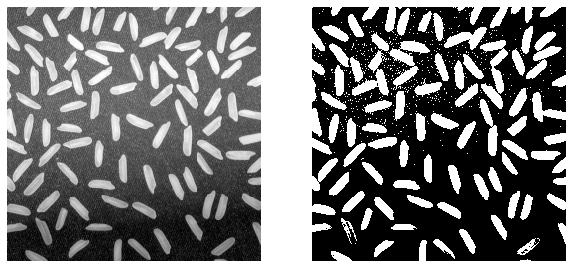

In [2]:
img = cv2.imread('rice.png', 0)
umbral = 120

output = np.zeros((img.shape))
output[img > umbral] = 255

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()

131.0


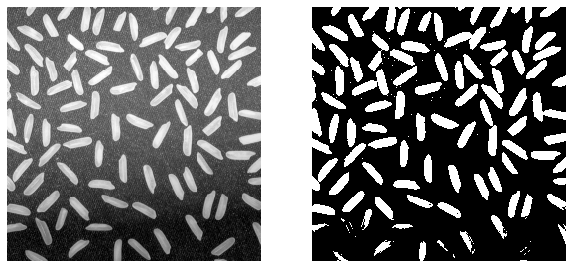

In [3]:
img = cv2.imread('rice.png', 0)

ret, thres = cv2.threshold(img, 0, 255,
                           cv2.THRESH_OTSU+cv2.THRESH_BINARY)
print(ret)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(thres, cmap='gray')
plt.show()

In [0]:
def dilatacion(img):
  newImg = np.zeros((img.shape[0]+2, img.shape[1]+2), dtype=np.uint8)
  newImg[1:img.shape[0]+1,1:img.shape[1]+1] = img

  output = np.zeros_like(newImg)
  
  n,m = newImg.shape
  for i in range(1, n-1):
    for j in range(1, m-1):
      if newImg[i][j] == 255:
        output[i,j-1:j+2] = output[i-1:i+2,j] = 255
  
  return output[1:img.shape[0]+1,1:img.shape[1]+1]

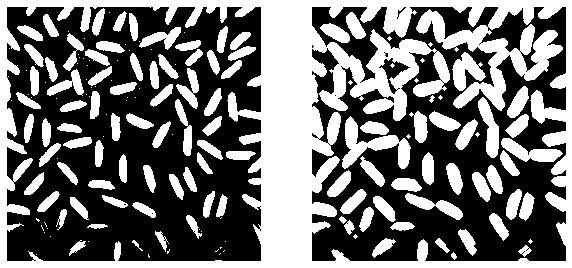

In [5]:
img = cv2.imread('rice.png', 0)

ret, thres = cv2.threshold(img, 0, 255,
                           cv2.THRESH_OTSU+cv2.THRESH_BINARY)

output = dilatacion(thres)
output = dilatacion(output)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(thres, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()

In [0]:
def erosion(img):
  new_img = np.ones((img.shape[0] + 2, img.shape[1] + 2), dtype = np.uint8)
  new_img[1:img.shape[0] + 1, 1 : img.shape[1] + 1] = img

  output = np.zeros_like(new_img)

  for i in range(1, new_img.shape[0] - 1):
    for j in range(1, new_img.shape[1] - 1):
      if(new_img[i , j] == 255 and new_img[i, j - 1] == 255 and new_img[i, j + 1] == 255 and new_img[i - 1, j] == 255 and new_img[i + 1, j] == 255):
        output[i, j] = 255
  
  return output[1:img.shape[0] + 1, 1:img.shape[1] + 1]

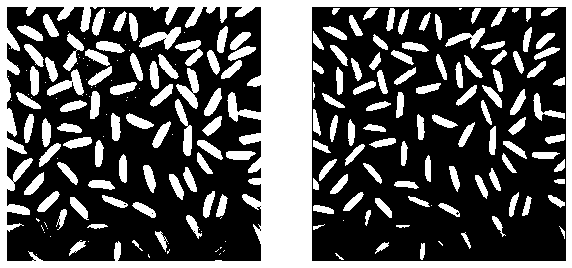

In [7]:
img = cv2.imread('rice.png', 0)

ret, thres = cv2.threshold(img, 0, 255,
                           cv2.THRESH_OTSU+cv2.THRESH_BINARY)

output = erosion(thres)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(thres, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()

Apertura: Erosion -> Dilatacion (Eliminar ruido)

In [0]:
def apertura(img):
  img = erosion(img)
  img = dilatacion(img)
  return img

Cierre: Dilatacion -> Erosion (Para cerrar huecos en los objetos)

In [0]:
def cierre(img):
  img = dilatacion(img)
  img = erosion(img)
  return img

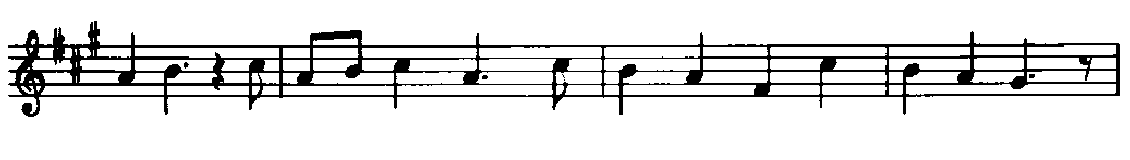

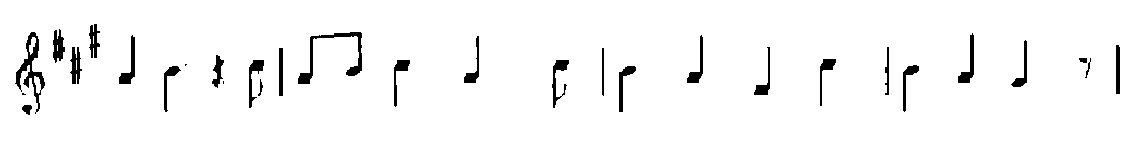

In [70]:
img = cv2.imread('partitura.png', 0)

def fun(img):
  new_img = np.ones((img.shape[0] + 2, img.shape[1] + 2), dtype = np.uint8)
  new_img[1:img.shape[0] + 1, 1 : img.shape[1] + 1] = img

  output = np.zeros_like(new_img)

  for i in range(1, new_img.shape[0] - 1):
    for j in range(1, new_img.shape[1] - 1):
      if new_img[i , j] == 255 and new_img[i-1, j] == 255 and new_img[i+1, j] == 255:
        output[i, j] = 255
  
  return output[1:img.shape[0] + 1, 1:img.shape[1] + 1]

ret, thres = cv2.threshold(img, 0, 255,
                           cv2.THRESH_OTSU+cv2.THRESH_BINARY)
output = fun(255 - thres)
output = fun(output)
output = 255 - output

plt.figure(figsize=(20,5))
plt.axis('off')
plt.imshow(thres, cmap='gray')
plt.show()
plt.figure(figsize=(20,5))
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()